In [23]:
import numpy as np
import pandas as pd
import importlib
import dataset
import config, plotting, sample, SampleCharacter, XLim, QRselection

importlib.reload(config)
importlib.reload(dataset)
importlib.reload(plotting)
importlib.reload(sample)
importlib.reload(SampleCharacter)
importlib.reload(XLim)
importlib.reload(QRselection)

<module 'QRselection' from 'D:\\netSVG\\QRselection.py'>

In [24]:
import os
dataset_config = config.DatasetConfig(scenario="functional", n_instance=1000)

assert(dataset_config.scenario == "functional" 
      )
fig_dir = f"../figures/{dataset_config.scenario}"

try:
    os.mkdir(fig_dir)
    print(f"Directory {fig_dir} created ") 
except FileExistsError:
    print(f"Directory {fig_dir} already exists replacing files in this notebook")


Directory ../figures/functional already exists replacing files in this notebook


In [25]:
X_test,Y_test = dataset.get_functional_test_data()

print("x_test:")
print(X_test)
print("y_test:")
print(Y_test)

x_test:
[[0.8492 0.3298]
 [0.7384 0.7672]
 [0.4299 0.1582]
 [0.2072 0.2864]
 [0.3234 0.6871]
 [0.3752 0.5121]
 [0.8171 0.7321]
 [0.5317 0.7498]
 [0.7743 0.2395]
 [0.3346 0.6629]
 [0.5746 0.8162]
 [0.8639 0.7939]
 [0.1986 0.4691]
 [0.6725 0.3095]
 [0.9018 0.6876]
 [0.4965 0.8296]
 [0.4128 0.068 ]
 [0.2343 0.6137]
 [0.775  0.8715]
 [0.9122 0.7888]]
y_test:
[0.9312 1.311  1.605  1.6383 2.7847 2.6119 1.8783 1.5906 0.6192 2.8536
 1.0994 1.8812 2.8353 0.2018 2.8333 1.2912 1.6482 3.3226 0.9821 2.3591]


In [26]:
X_train,Y_train = dataset.get_functional_train_data()

print("x_train:")
print(X_train)
print("y_train:")
print(Y_train)

x_train:
[[0.4522 0.3192]
 [0.3904 0.2042]
 [0.9764 0.07  ]
 [0.5233 0.95  ]
 [0.1109 0.1412]
 [0.3299 0.7213]
 [0.3421 0.9288]
 [0.5211 0.4073]
 [0.1203 0.5209]
 [0.6255 0.2191]
 [0.3466 0.8424]
 [0.1992 0.9869]
 [0.2983 0.7699]
 [0.8899 0.7061]
 [0.5014 0.5953]
 [0.277  0.7529]
 [0.534  0.4967]
 [0.5743 0.8651]
 [0.0148 0.9685]
 [0.7028 0.0988]
 [0.5067 0.547 ]
 [0.3813 0.403 ]
 [0.0649 0.107 ]
 [0.3586 0.7242]
 [0.2035 0.783 ]
 [0.8138 0.5666]
 [0.3934 0.8113]
 [0.0536 0.5768]
 [0.3751 0.944 ]
 [0.1653 0.5076]]
y_train:
[0.7824 1.4808 2.7607 1.1487 2.4417 2.5728 1.8034 1.1039 3.2106 0.5796
 1.8635 2.5832 2.4064 2.621  2.3293 2.5767 1.8732 0.9187 2.2113 1.0467
 2.2373 1.6296 2.3883 2.4399 2.5703 2.3635 1.8007 3.2736 1.7206 3.154 ]


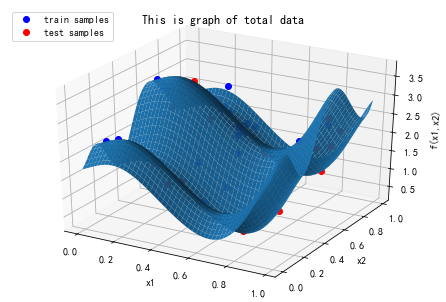

In [27]:
exp_config = config.Config(
    model=config.ModelConfig(activation="elu", lr_gen=0.0001, dec_gen=0, lr_disc=0.001, optim_gen="Adam", 
                             optim_disc="Adam", z_input_size=1),
    training=config.TrainingConfig(n_epochs=2000, batch_size=100, n_samples=100),
    dataset=dataset_config,
    run=config.RunConfig(save_fig=1)
)

plotting.plot_front(X_train, Y_train, X_test, Y_test, exp_config, fig_dir)


In [28]:
coef = sample.get_sta_reg_cov(X_train,Y_train)

Unstandardized regression coefficient: 
[-1.08468  0.09633]
normal coefficient: 
2.44233
Standardized regression coefficient: 
[-0.36156  0.0381 ]
normal coefficient: 
-0.0


In [29]:
imp = sample.get_importance(coef,Y_train)

y std:
0.71508
The importance for every dimension:
[0.50562 0.05328]


In [30]:
length = sample.get_sample_length(X_train,imp)


欧氏距离：
[0.    0.017 0.337 0.403 0.148 0.177 0.384 0.013 0.151 0.04  0.285 0.51
 0.227 0.341 0.079 0.219 0.038 0.313 0.613 0.111 0.055 0.012 0.195 0.173
 0.277 0.192 0.246 0.225 0.396 0.118 0.017 0.    0.361 0.574 0.082 0.271
 0.527 0.058 0.173 0.055 0.409 0.649 0.328 0.501 0.165 0.314 0.106 0.471
 0.725 0.109 0.131 0.04  0.115 0.271 0.37  0.311 0.369 0.252 0.548 0.143
 0.337 0.361 0.    0.98  0.754 0.842 1.14  0.321 0.936 0.145 0.993 1.445
 0.95  0.412 0.502 0.956 0.378 0.794 1.732 0.076 0.448 0.465 0.832 0.81
 1.106 0.273 0.889 1.108 1.125 0.849 0.403 0.574 0.98  0.    0.824 0.09
 0.033 0.295 0.347 0.545 0.043 0.106 0.083 0.194 0.126 0.1   0.206 0.01
 0.259 0.757 0.163 0.319 0.921 0.078 0.13  0.231 0.036 0.36  0.022 0.324
 0.148 0.082 0.754 0.824 0.    0.384 0.674 0.239 0.144 0.271 0.547 0.723
 0.43  0.926 0.359 0.402 0.305 0.739 0.694 0.352 0.321 0.142 0.003 0.401
 0.42  0.675 0.529 0.193 0.714 0.137 0.177 0.271 0.842 0.09  0.384 0.
 0.043 0.135 0.084 0.34  0.015 0.088 0.003 0.314 0.0

In [31]:
L = sample.get_x_len(X_train)

X_train.T:
[[0.4522 0.3904 0.9764 0.5233 0.1109 0.3299 0.3421 0.5211 0.1203 0.6255
  0.3466 0.1992 0.2983 0.8899 0.5014 0.277  0.534  0.5743 0.0148 0.7028
  0.5067 0.3813 0.0649 0.3586 0.2035 0.8138 0.3934 0.0536 0.3751 0.1653]
 [0.3192 0.2042 0.07   0.95   0.1412 0.7213 0.9288 0.4073 0.5209 0.2191
  0.8424 0.9869 0.7699 0.7061 0.5953 0.7529 0.4967 0.8651 0.9685 0.0988
  0.547  0.403  0.107  0.7242 0.783  0.5666 0.8113 0.5768 0.944  0.5076]]
第0行最大值：0.9764   最小值：0.0148
第1行最大值：0.9869   最小值：0.07
The length of every diversion:
[0.9616 0.9169]


In [32]:
n_sample,length = sample.divide_sample(X_train, length)

第0行最大值：0.9764   最小值：0.0148
第1行最大值：0.9869   最小值：0.07
第0维的分割数是：102
102
第1维的分割数是：917
917
总的样方分割数为：
93534
第0维的分割数是：51
51
第1维的分割数是：459
459
总的样方分割数为：
23409
第0维的分割数是：26
26
第1维的分割数是：230
230
总的样方分割数为：
5980
第0维的分割数是：13
13
第1维的分割数是：115
115
总的样方分割数为：
1495
第0维的分割数是：7
7
第1维的分割数是：58
58
总的样方分割数为：
406
第0维的分割数是：4
4
第1维的分割数是：29
29
总的样方分割数为：
116
分割数：
[ 4 29]
样方的大小：
[0.30368 0.032  ]


In [33]:
gen_x = sample.gen_x_center(X_train,length,n_sample)

第0维度，最小的x为0.0148
index= 0
第0维度的x生成的值有：
[0.0148, 0.31848, 0.62216, 0.9258400000000001]
第1维度，最小的x为0.07
index= 1
第1维度的x生成的值有：
[0.07, 0.10200000000000001, 0.134, 0.166, 0.198, 0.23, 0.262, 0.29400000000000004, 0.326, 0.35800000000000004, 0.39, 0.422, 0.454, 0.48600000000000004, 0.518, 0.55, 0.5820000000000001, 0.6140000000000001, 0.6460000000000001, 0.6779999999999999, 0.71, 0.742, 0.774, 0.806, 0.8380000000000001, 0.8700000000000001, 0.9020000000000001, 0.9339999999999999, 0.966]
生成的x值：
[[0.0148, 0.31848, 0.62216, 0.9258400000000001], [0.07, 0.10200000000000001, 0.134, 0.166, 0.198, 0.23, 0.262, 0.29400000000000004, 0.326, 0.35800000000000004, 0.39, 0.422, 0.454, 0.48600000000000004, 0.518, 0.55, 0.5820000000000001, 0.6140000000000001, 0.6460000000000001, 0.6779999999999999, 0.71, 0.742, 0.774, 0.806, 0.8380000000000001, 0.8700000000000001, 0.9020000000000001, 0.9339999999999999, 0.966]]


In [34]:
gen_sample_point = sample.gen_product(gen_x)
print("生成的样方中心点：")
gen_sample_point = np.array(gen_sample_point)
print(gen_sample_point)

生成的样方中心点：
[[0.0148  0.07   ]
 [0.0148  0.102  ]
 [0.0148  0.134  ]
 [0.0148  0.166  ]
 [0.0148  0.198  ]
 [0.0148  0.23   ]
 [0.0148  0.262  ]
 [0.0148  0.294  ]
 [0.0148  0.326  ]
 [0.0148  0.358  ]
 [0.0148  0.39   ]
 [0.0148  0.422  ]
 [0.0148  0.454  ]
 [0.0148  0.486  ]
 [0.0148  0.518  ]
 [0.0148  0.55   ]
 [0.0148  0.582  ]
 [0.0148  0.614  ]
 [0.0148  0.646  ]
 [0.0148  0.678  ]
 [0.0148  0.71   ]
 [0.0148  0.742  ]
 [0.0148  0.774  ]
 [0.0148  0.806  ]
 [0.0148  0.838  ]
 [0.0148  0.87   ]
 [0.0148  0.902  ]
 [0.0148  0.934  ]
 [0.0148  0.966  ]
 [0.31848 0.07   ]
 [0.31848 0.102  ]
 [0.31848 0.134  ]
 [0.31848 0.166  ]
 [0.31848 0.198  ]
 [0.31848 0.23   ]
 [0.31848 0.262  ]
 [0.31848 0.294  ]
 [0.31848 0.326  ]
 [0.31848 0.358  ]
 [0.31848 0.39   ]
 [0.31848 0.422  ]
 [0.31848 0.454  ]
 [0.31848 0.486  ]
 [0.31848 0.518  ]
 [0.31848 0.55   ]
 [0.31848 0.582  ]
 [0.31848 0.614  ]
 [0.31848 0.646  ]
 [0.31848 0.678  ]
 [0.31848 0.71   ]
 [0.31848 0.742  ]
 [0.31848 0.774  ]
 [

In [35]:
gen_x_point = sample.gen_true_x(X_train,gen_sample_point,length)
print(gen_x_point)

[[0.0148  0.07   ]
 [0.0148  0.166  ]
 [0.0148  0.198  ]
 [0.0148  0.23   ]
 [0.0148  0.262  ]
 [0.0148  0.294  ]
 [0.0148  0.326  ]
 [0.0148  0.358  ]
 [0.0148  0.39   ]
 [0.0148  0.422  ]
 [0.0148  0.454  ]
 [0.0148  0.486  ]
 [0.0148  0.55   ]
 [0.0148  0.614  ]
 [0.0148  0.646  ]
 [0.0148  0.678  ]
 [0.0148  0.71   ]
 [0.0148  0.742  ]
 [0.0148  0.774  ]
 [0.0148  0.806  ]
 [0.0148  0.838  ]
 [0.0148  0.87   ]
 [0.0148  0.902  ]
 [0.0148  0.934  ]
 [0.31848 0.07   ]
 [0.31848 0.102  ]
 [0.31848 0.134  ]
 [0.31848 0.166  ]
 [0.31848 0.23   ]
 [0.31848 0.262  ]
 [0.31848 0.294  ]
 [0.31848 0.358  ]
 [0.31848 0.422  ]
 [0.31848 0.454  ]
 [0.31848 0.486  ]
 [0.31848 0.518  ]
 [0.31848 0.55   ]
 [0.31848 0.582  ]
 [0.31848 0.614  ]
 [0.31848 0.646  ]
 [0.31848 0.678  ]
 [0.31848 0.87   ]
 [0.31848 0.902  ]
 [0.31848 0.966  ]
 [0.62216 0.07   ]
 [0.62216 0.134  ]
 [0.62216 0.166  ]
 [0.62216 0.198  ]
 [0.62216 0.262  ]
 [0.62216 0.294  ]
 [0.62216 0.326  ]
 [0.62216 0.358  ]
 [0.62216 0.

In [36]:
import GPy

noise = 1
length_ = 1

run_hyperopt_search = True

kernel = GPy.kern.RBF(input_dim=2, variance=noise, lengthscale=length_)
#Y_train = np.reshape((-1,1))
gpr = GPy.models.GPRegression(X_train, Y_train.reshape(-1,1), kernel)
if run_hyperopt_search:
    gpr.optimize(messages=True) 


In [37]:
gen_y, cov_train = gpr.predict(gen_x_point)


In [38]:
import statsmodels.api as sm
qrX = X_train
qrX = sm.add_constant(qrX[0:])
qr = sm.QuantReg(Y_train.reshape(-1,1),qrX)
res = qr.fit(q=.2)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2960
Model:                       QuantReg   Bandwidth:                       1.146
Method:                 Least Squares   Sparsity:                        2.326
Date:                Thu, 20 Aug 2020   No. Observations:                   30
Time:                        08:40:22   Df Residuals:                       27
                                        Df Model:                            2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5650      0.695      3.692      0.001       1.140       3.990
x1            -2.8775      0.796     -3.617      0.001      -4.510      -1.245
x2             0.0942      0.791      0.119      0.906      -1.528       1.717


In [39]:
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = qr.fit(q=q)
    return [q, res.params[0], res.params[1] ,res.params[2],]

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b1', 'b2'])

ols = sm.OLS(Y_train.reshape(-1,1),qrX).fit()
ols = dict(a = ols.params[0],
           b1 = ols.params[1],
           b2 = ols.params[2])
           
print(models)
print(ols)

 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:235: RuntimeWarning:invalid value encountered in less_equal
 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:Maximum number of iterations (1000) reached.


      q         a        b1        b2
0  0.05  1.530676 -2.174261  0.735987
1  0.15  2.567733 -3.289506  0.318279
2  0.25  2.546961 -2.863963  0.254308
3  0.35  2.525044 -2.103183 -0.002307
4  0.45  2.509104 -2.101315  0.145759
5  0.55  2.492161 -0.770475  0.247763
6  0.65  2.469207 -0.531752  0.222838
7  0.75  2.786796 -0.438077 -0.117876
8  0.85  3.899026 -1.085968 -1.114096
9  0.95  3.496790 -0.731011 -0.319027
{'a': 2.442331164960009, 'b1': -1.0846771586848056, 'b2': 0.09632890094793461}


In [40]:
del_x_points = sample.del_x(gen_sample_point, gen_x_point)

print(del_x_points)

[[0.0148  0.102  ]
 [0.0148  0.134  ]
 [0.0148  0.518  ]
 [0.0148  0.582  ]
 [0.0148  0.966  ]
 [0.31848 0.198  ]
 [0.31848 0.326  ]
 [0.31848 0.39   ]
 [0.31848 0.71   ]
 [0.31848 0.742  ]
 [0.31848 0.774  ]
 [0.31848 0.806  ]
 [0.31848 0.838  ]
 [0.31848 0.934  ]
 [0.62216 0.102  ]
 [0.62216 0.23   ]
 [0.62216 0.422  ]
 [0.62216 0.486  ]
 [0.62216 0.55   ]
 [0.62216 0.582  ]
 [0.62216 0.87   ]
 [0.92584 0.07   ]
 [0.92584 0.582  ]
 [0.92584 0.71   ]]


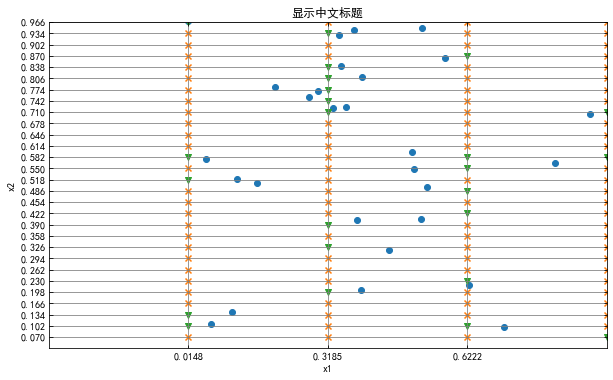

In [41]:
plotting.plot_genx(X_train, gen_x_point, del_x_points, length, n_sample)

In [42]:
is_filter = []
for i in range(n_sample[0]):
    list1 = []
    for j in range(n_sample[1]):
        d = 0
        list1.append(d)
    is_filter.append(list1)
is_filter = np.array(is_filter)

print(is_filter)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [43]:
is_filter = sample.gen_is_list(X_train, length, is_filter)
print(is_filter)

[[0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0]
 [0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]]


In [44]:
a = [[[ 1,2],[ 0, 3]],[[12, 2],[ 1 ,2]]]
a = np.array(a)
print (a)

n = np.argmin(a, axis=0)
print(n)

m = np.amin(a, axis=0)
print(m)

[[[ 1  2]
  [ 0  3]]

 [[12  2]
  [ 1  2]]]
[[0 0]
 [0 1]]
[[1 2]
 [0 2]]
